# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata["Mouse ID"] = mouse_metadata["Mouse ID"].astype(str)
study_results["Mouse ID"] = study_results["Mouse ID"].astype(str)
# Combine the data into a single DataFrame
df_joined = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the data table for preview
df_joined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
num_mice = df_joined["Mouse ID"].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = df_joined[df_joined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dup_mice_ids = dup_mice["Mouse ID"].unique()
dup_mice_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_id = "g989"
dup_mice_data = df_joined[df_joined["Mouse ID"] == mouse_id]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = df_joined[~df_joined["Mouse ID"].isin(dup_mice_ids)]
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = df_clean["Mouse ID"].nunique()
clean_num_mice

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = grouped.mean()
median_tumor_volume = grouped.median()
tumor_volume_variance = grouped.var()
tumor_volume_std_dev = grouped.std()
tumor_volume_sem = grouped.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume Std. Err.": tumor_volume_sem
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats2 = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean Tumor Volume", "mean"),
    ("Median Tumor Volume", "median"),
    ("Tumor Volume Variance", "var"),
    ("Tumor Volume Std. Dev.", "std"),
    ("Tumor Volume Std. Err.", "sem")
])
summary_stats2

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

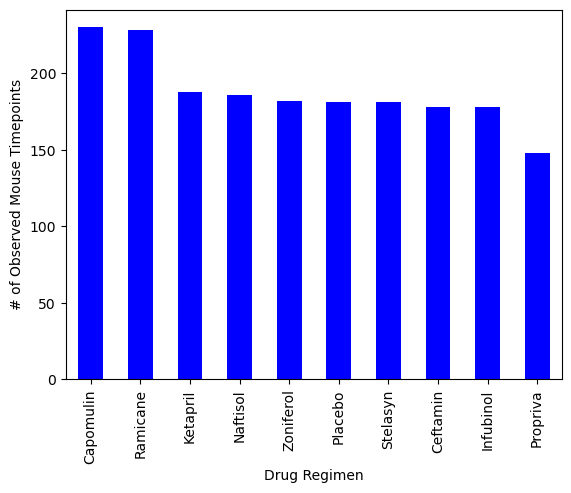

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = df_clean.groupby("Drug Regimen").size().sort_values(ascending=False)
b_plot = counts.plot(kind="bar", color="blue")
b_plot.set_xlabel("Drug Regimen") 
b_plot.set_ylabel("# of Observed Mouse Timepoints")
b_plot

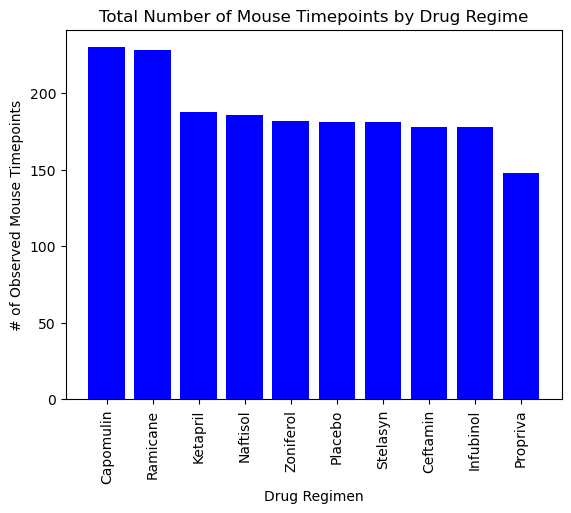

In [13]:
# Generate the counts of each drug regimen
df_plt = df_clean.groupby("Drug Regimen").size().sort_values(ascending=False)

# Create the bar plot using PyPlot
plt.bar(df_plt.index, df_plt.values, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mouse Timepoints by Drug Regime")
plt.xticks(rotation=90)
plt.show()

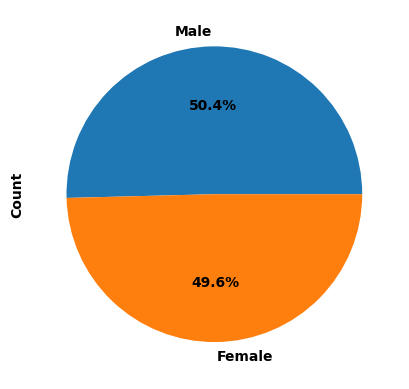

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = df_clean[["Mouse ID", "Sex"]].drop_duplicates()
# Get the unique mice with their gender
count_gender = unique_mice["Sex"].value_counts()

# Make the pie chart
count_gender.plot.pie(autopct='%1.1f%%', textprops={"fontweight": "bold"})
plt.xlabel("")
plt.ylabel("Count", fontweight="bold")
plt.show()

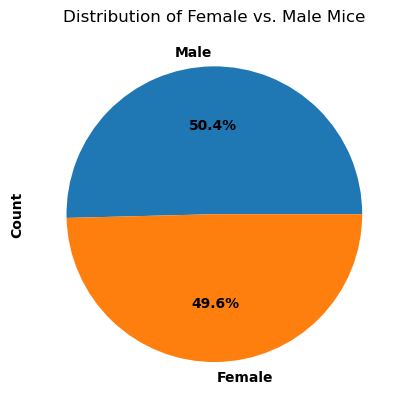

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Male", "Female"]

# Get the unique mice with their gender
# Make the pie chart
plt.pie(count_gender, labels=labels, autopct="%1.1f%%", textprops={"fontweight": "bold"})
plt.ylabel("Count", fontweight="bold")
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = df_joined.groupby("Mouse ID").last().reset_index()
last_merged = pd.merge(last_tp_df, df_joined, on=["Mouse ID", "Timepoint"])
last_tumor_vol = last_merged[last_merged["Drug Regimen_x"].isin(["Capomulin" ,"Ramicane" , "Infubinol", "Ceftamin"])]
last_tumor_vol.head()




,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,a203,45,67.973419,2,Infubinol,Female,20,23,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25,43.047543,0,Ramicane,Female,10,25


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = ["Capomulin" ,"Ramicane" , "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatment_labels:
    treatment_volumes = last_tumor_vol[last_tumor_vol["Drug Regimen_x"] == treatment]["Tumor Volume (mm3)_x"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Q1 = treatment_volumes.quantile(.25)
    Q3 = treatment_volumes.quantile(.75)
    IQR = Q3 - Q1

    # add subset
    treatment_volumes_subset = treatment_volumes[(treatment_volumes >= Q1 - 1.5 * IQR) & (treatment_volumes <= Q3 + 1.5 * IQR)]

    # Determine outliers using upper and lower bounds
    lower_bounds = Q1 - 1.5 * IQR
    upper_bounds = Q3 + 1.5 * IQR
    outliers = treatment_volumes[(treatment_volumes < lower_bounds) | (treatment_volumes > upper_bounds)]

    tumor_vol_data.append({
        "Treatment": treatment,
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bounds": lower_bounds,
        "Upper Bounds": upper_bounds,
        "Outliers": outliers,
        "Non-Outlier Volumes": treatment_volumes_subset
    })

for data in tumor_vol_data:
    outlier_series = data["Outliers"]
    print(f"{data['Treatment']}'s potential outliers: {outlier_series}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3)_x, dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


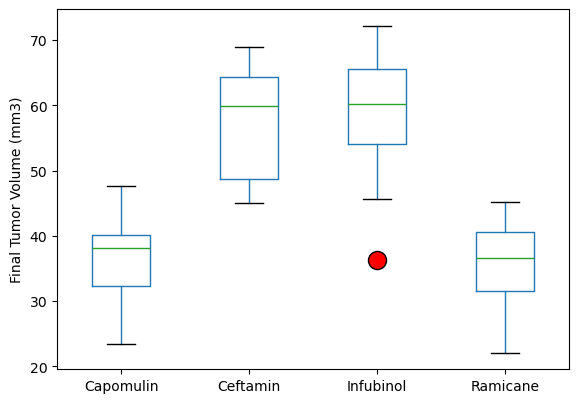

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
last_tumor_vol.boxplot(column= "Tumor Volume (mm3)_x", by="Drug Regimen_x", grid=False, flierprops=dict(marker="o", markerfacecolor="red", markeredgecolor="black", markersize=13))
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

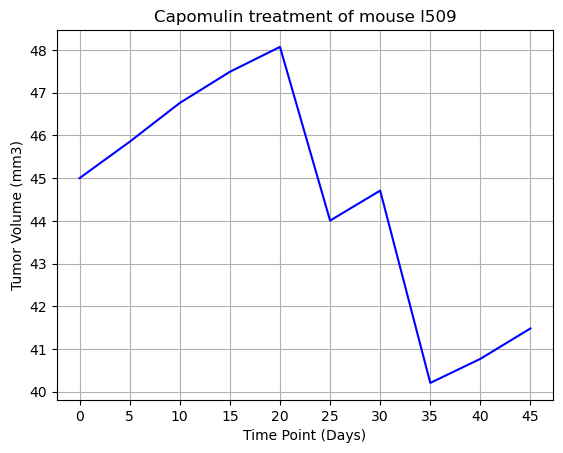

In [21]:
#Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
mouse_data = df_clean[df_clean["Mouse ID"] == mouse_id]

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], color="b")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(mouse_data["Timepoint"])
plt.grid(True)


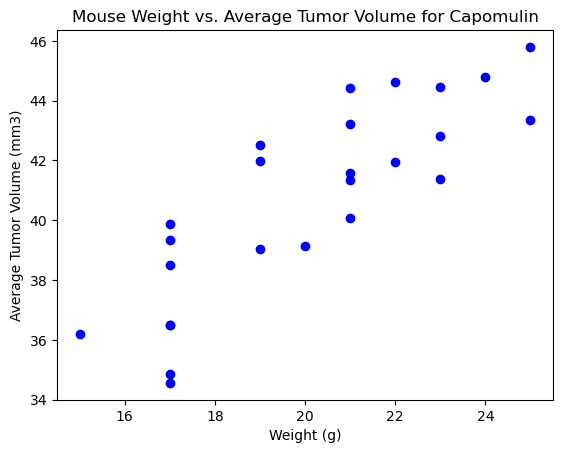

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = df_clean[df_clean["Drug Regimen"] == "Capomulin"]
mouse_avg_tumor = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
plt.scatter(mouse_avg_tumor["Weight (g)"], mouse_avg_tumor["Tumor Volume (mm3)"], color="b")

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weights = mouse_avg_tumor["Weight (g)"]
avg_tumor_vol = mouse_avg_tumor["Tumor Volume (mm3)"]

correlation, p_value = pearsonr(weights, avg_tumor_vol)
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.841936342469472
P-value: 1.3225722434712605e-07


In [25]:
slope, intercept, x, x, x = linregress(weights, avg_tumor_vol)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.9544396890241049
Intercept: 21.552160532685008


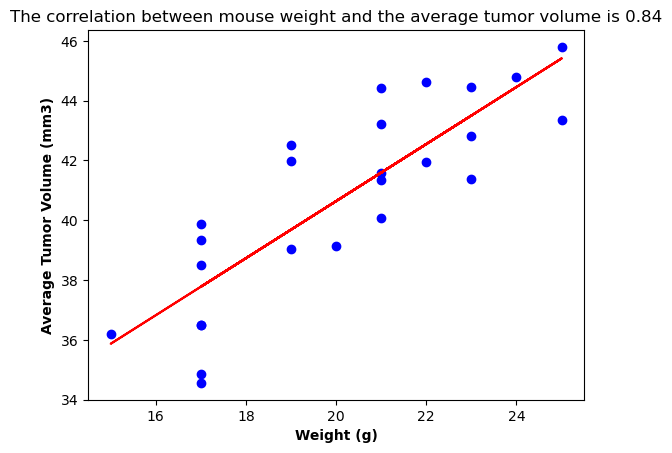

In [26]:
plt.scatter(weights, avg_tumor_vol, color="b", label="Data points")
plt.xlabel("Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3)", fontweight="bold")
plt.title(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
regression_line = slope * weights + intercept
plt.plot(weights, regression_line, color="r", label="Fitted line")

plt.show()